# Analizing Some Aggregated Results of a 100 Runs of the EA

# Preliminaries
## Importing packages

In [1]:
import numpy as np

%matplotlib inline

import seaborn as sns
#sns.set()
#sns.set_style('whitegrid')
#sns.set_context('notebook')
import matplotlib.pyplot as plt
plt.style.use('bmh')

from thesis_EAfunc import *
from thesis_visfunc import *

In [2]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

2019-05-03 07:52:32.999922


# Define landscape

In [3]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

0.0

# Running the EA
## Setting parameters

In [4]:
#starting seed
np.random.seed(654321)

In [5]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 100
gen_f = 40

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 10

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'Simple'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='Ranking'

## Running it a 100 times

In [6]:
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

# Data analysis
## Top 10 fittest

In [7]:
query = (fitness_res['generation']==40)
fitness_res[query].sort_values(by=['fitness_mean']).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
1188,28,40.0,0.050086,0.178097,0.062887,0.039401
1516,36,40.0,0.092156,0.092156,0.092156,0.000000
2090,50,40.0,0.114624,0.114624,0.114624,0.000000
3812,92,40.0,0.126988,0.126988,0.126988,0.000000
3361,81,40.0,0.139385,0.139385,0.139385,0.000000
2705,65,40.0,0.143681,0.143681,0.143681,0.000000
1680,40,40.0,0.151992,0.151992,0.151992,0.000000
40,0,40.0,0.171040,0.171040,0.171040,0.000000
2213,53,40.0,0.174968,0.174968,0.174968,0.000000
2172,52,40.0,0.186304,0.186304,0.186304,0.000000


## Top 10 least fit

In [8]:
fitness_res[query].sort_values(by=['fitness_mean'], ascending=False).head(10)

,run,generation,fitness_min,fitness_max,fitness_mean,fitness_std
1762,42,40.0,0.429932,0.610546,0.583030,0.051082
778,18,40.0,0.440904,0.440904,0.440904,0.000000
1557,37,40.0,0.432822,0.432822,0.432822,0.000000
737,17,40.0,0.339265,0.427991,0.420270,0.022108
3279,79,40.0,0.418138,0.418138,0.418138,0.000000
4017,97,40.0,0.399200,0.399200,0.399200,0.000000
1844,44,40.0,0.386843,0.386843,0.386843,0.000000
3443,83,40.0,0.343881,0.411744,0.376698,0.017383
450,10,40.0,0.339023,0.382762,0.369986,0.018598
819,19,40.0,0.351136,0.389912,0.368077,0.019234


# Data visualization
## Agregated results visualization

In [9]:
query = (fitness_res['generation']==40)
type(fitness_res[query]['fitness_mean'])

pandas.core.series.Series

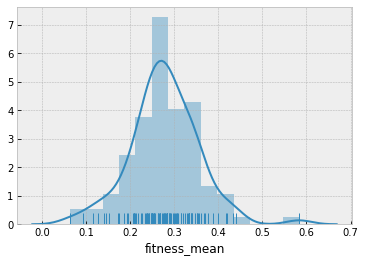

In [10]:
sns.distplot(fitness_res[query]['fitness_mean'],rug=True)

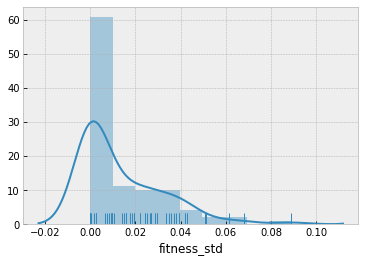

In [11]:
sns.distplot(fitness_res[query]['fitness_std'],rug=True)

## Population movement

In [11]:
#Visualization parameters
grph_steps = 61
a=15
b=-60
ratio_w=1.3
ln=.75


Generation 0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


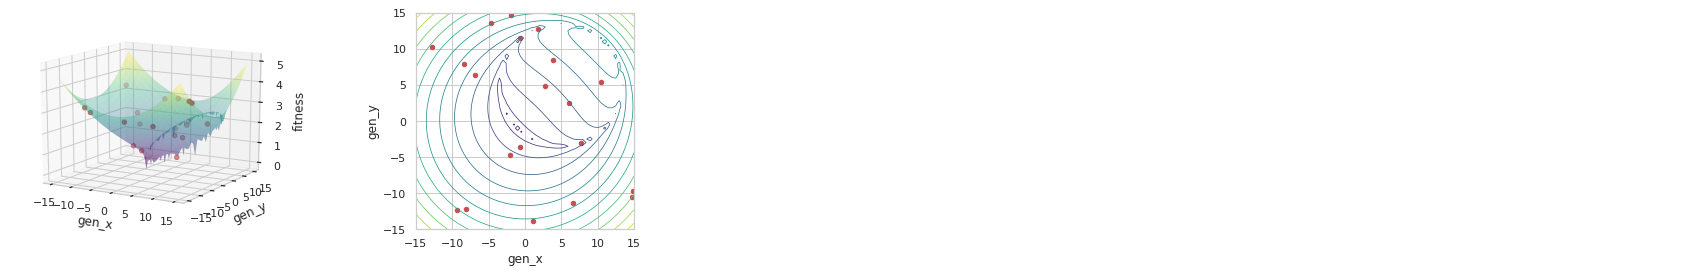

Generation 4


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


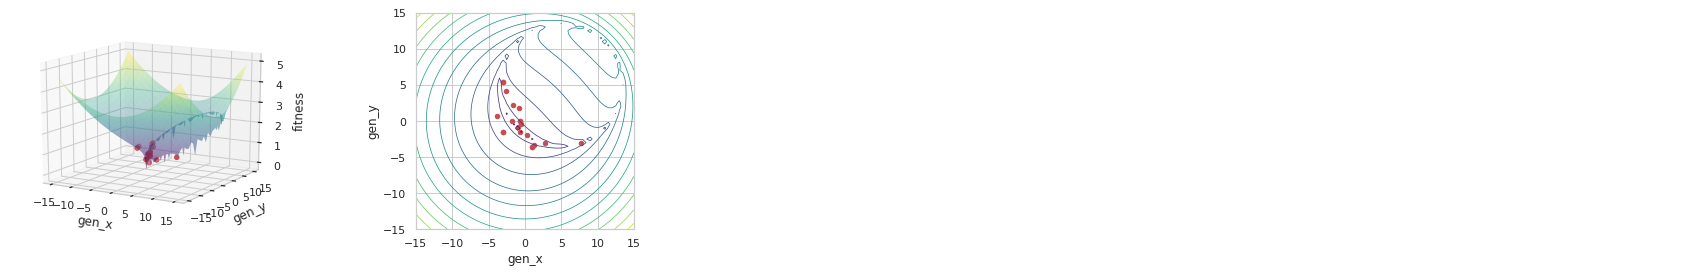

Generation 8


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


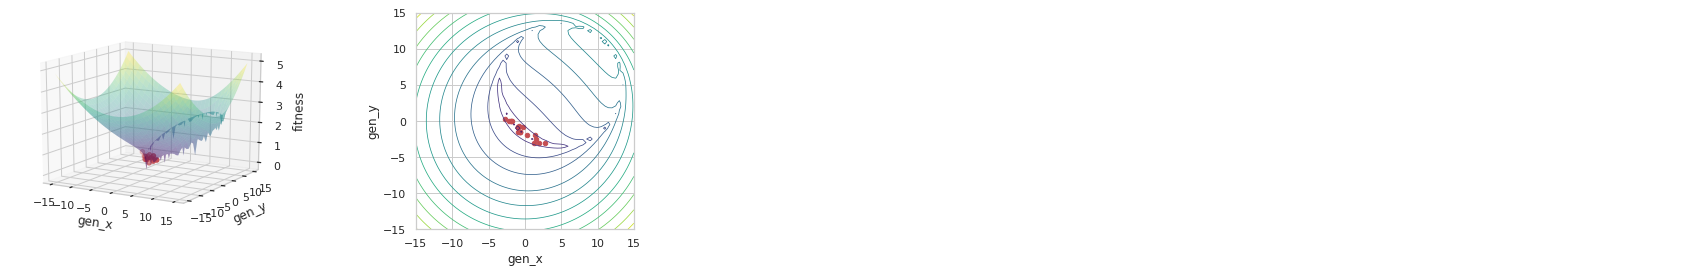

Generation 16


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


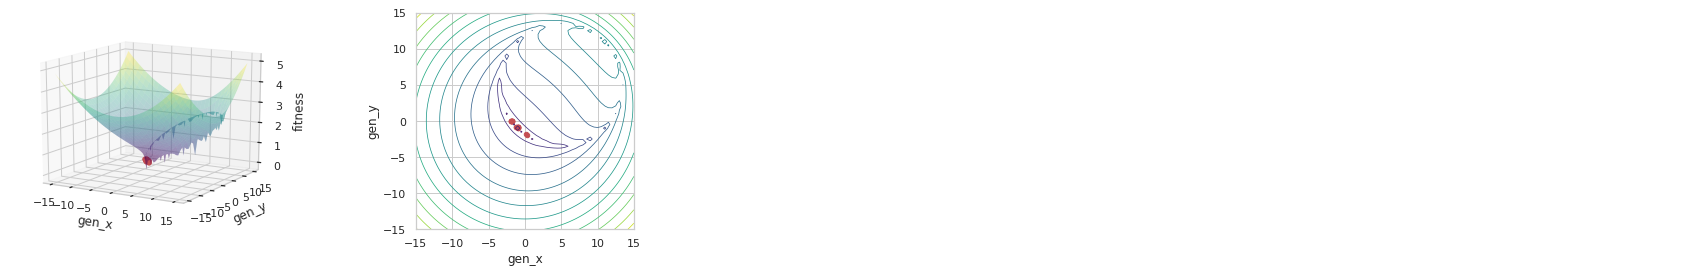

Generation 24


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


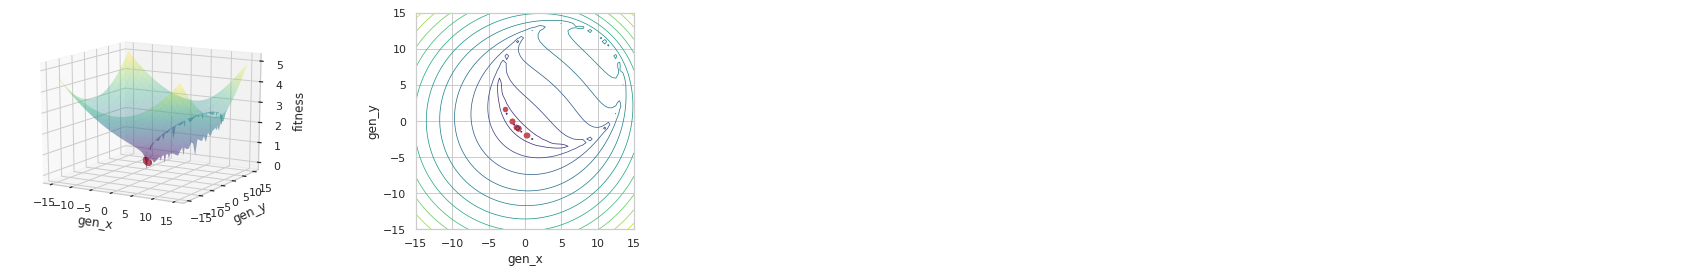

Generation 32


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


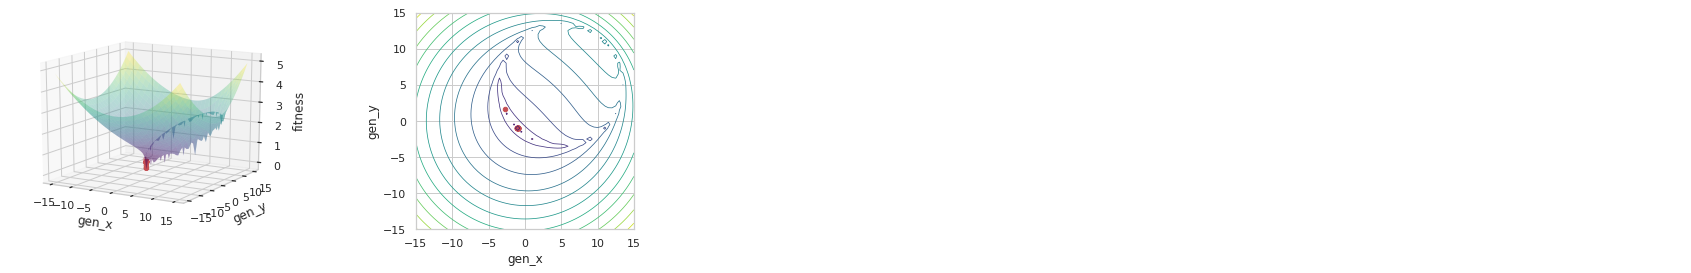

Generation 40


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


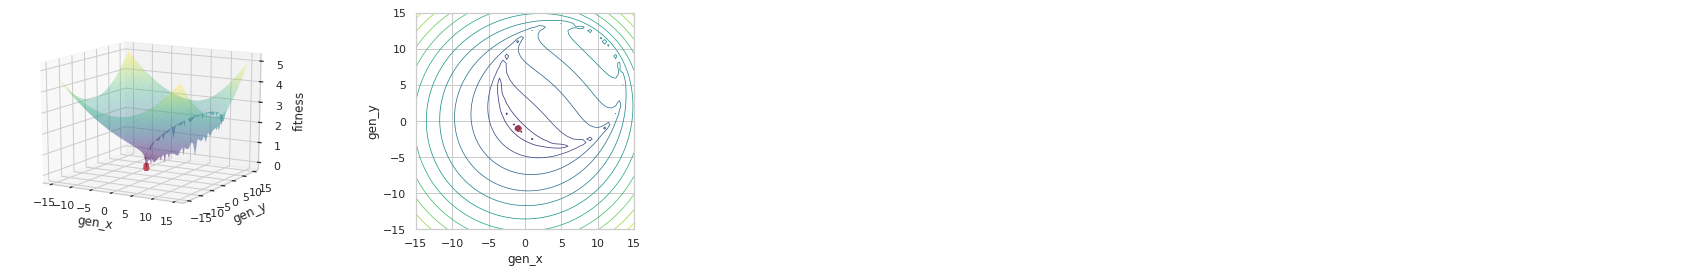

In [16]:
run_s = 28

print('Generation 0')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 4')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 4, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 8')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 8, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 16')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 16, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 24')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 24, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 32')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 32, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

In [17]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-01 09:41:26.496288
0:03:44.789855


In [18]:
query = (genera_res['generation']==40) & (genera_res['run']==run_s)
genera_res[query]

,run,generation,birthdate,function,fitness,gen_x,gen_y
35360,28,40,292,population,0.050086,-1.013958,-0.986029
35361,28,40,375,population,0.050086,-1.013958,-0.986029
35362,28,40,390,population,0.050086,-1.013958,-0.986029
35363,28,40,405,population,0.050086,-1.013958,-0.986029
35364,28,40,400,population,0.050086,-1.013958,-0.986029
35365,28,40,327,population,0.050086,-1.013958,-0.986029
35366,28,40,349,population,0.050086,-1.013958,-0.986029
35367,28,40,362,population,0.050086,-1.013958,-0.986029
35368,28,40,354,population,0.050086,-1.013958,-0.986029
35369,28,40,361,population,0.050086,-1.013958,-0.986029


In [15]:
time_b = datetime.datetime.now()
print(time_b)
print(time_b-time_a)

2019-05-01 09:39:00.863275
0:01:19.156842
